
# __Building a Neural Network using Keras__

### __By: Waleed Daud__


### __ Welcome!!__

#### This's an example of a feedforward NN (a normal one), so for more info about other types of NN please go to:

##### Convolution NN: https://keras.io/layers/convolutional/
##### Recurrent NN: https://keras.io/layers/recurrent/


## __Objective: __
#### __In this tutorial__ we'll try to predict if a woman has a breast cancer or not using feedforward neural network.

##### Input: features about the women.
##### Output: has abreast cancer or not.

## __Prerequisite:__
#### 1/ Familiarity with python
#### 2/ Basic Understanding of Neural Network.



## __Note:__
#### 1/ I'll use python 3. 

#### 2/ Our Network will have 1 hidden layer and an output layer, of course you can change this setting to add whatever you want from layers and hidden units. 

#### 3/ you should have: Numpy , matplotlib, tensorflow  installed in your computer.

##### __let's Begin!!__
<br><br><br>

# __ Feed Forward Neural Network Diagram__ 
![alt text ](http://cse22-iiith.vlabs.ac.in/exp4/images/structure.png)

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __Image by__ [Lucas Rodés-Guirao](https://www.kaggle.com/luikna/eda-and-tensorflow-implementation)

<br><br><br><br><br>
# __Initial Steps:__

###  __ 0.1 Installing Keras__

__Python 3: __

__Open the terminal and type: __

> __pip3 install keras__ 

### __ 0.2 Importing the Libraries__

In [38]:
# you'll find more illustrations about these import statements later !!

from keras.models import Sequential            

from keras.layers import Dense  

from keras.utils import to_categorical              

from sklearn.datasets import load_breast_cancer
from sklearn.cross_validation import train_test_split

import  matplotlib.pyplot as plt

%matplotlib inline

# __Step 1: Building our  Neural Network__ 

In [39]:

model = Sequential() # this's the NN algorithm, it's implemented for you,you don't need to code this from scratch
                    #but if you want to you're more than welcome!!

### __1.1 Adding the layers__
__ units : Number of units__ <br>
__activation : Type of activation fuction__<br>
__ input_dim: Number of input features__<br>

In [40]:
model.add(Dense(units=64, activation='relu', input_dim=30))        # layer one (hidden layer). 
model.add(Dense(units=2, activation='softmax'))                    # output layer.


### __1.2 Configuring the model for training.__

__loss: type of loss function__ <br>
__optimizer: type of optimization algorithm. (ex: gradient decent)__<br>
__metrics: a model metric ,just to help for outputting the accuracy of the model.__<br>


In [41]:

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# __Step 2: Loading Data__

###  __2.1 Loading data__

In [42]:

data=load_breast_cancer()    # loading the data, data usually is a file with an extension .csv ,....... 
                             # example: breast_cancer.csv 
                             # then you will use a function to load it, here all this is done by
                             # load_breast_cancer() function


            
X=data.data                  # this's the data (woman's features).
y=data.target                # this the label of that data.



### __2.2 Plotting (optional but recommended)__

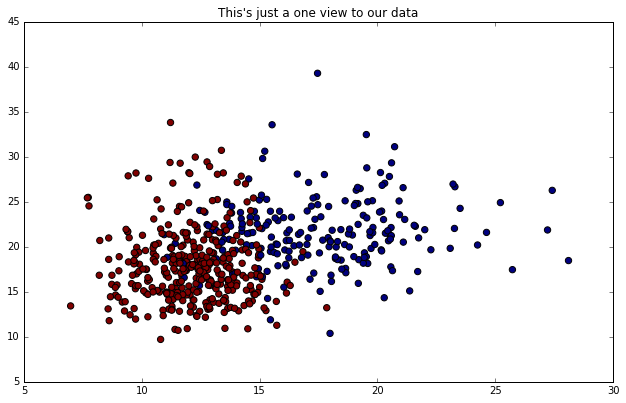

In [43]:
plt.figure(figsize=(20, 20))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(321)
plt.title("This's just a one view to our data")

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='K')


# __Step 3 (Optional but recommended): Splitting the data into two sets: training and testing sets.__
__We will divide our data to training set: 70% and testing set: 30%__<br><br>
__1- test_size: 0.3 means 30%__ <br>
__2- random_state: this parameter just to guarantee when you run the code over and over,
the data in the two sets will be the same,this's just for an educational purpose, so never mind!!__


In [44]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

### __Converting the labels to a categorical one.__

__ In this example, we have two labels 0 or 1 , so each example will have one of thoes labels, so if we can 
symbolize each one them by a vector :__<br>

__ 0 will be [1 0] <br>
1 Will be [0 1]__ <br>

__so, if we run our model and the result was "a women has breast cancer", the first neuron will have a value of  1 and the seocnd will be 0.__

In [45]:
y_train_binary = to_categorical(y_train)
y_test_binary=to_categorical(y_test)

# uncomment this and see the result!!
#print(y_train_binary)

# __Step 4: Training__

__epochs:__ An epoch is an iteration over the entire x_train and y_train_binary <br>
__batch size:__  check the image <br>

__batch_size:__

__ let's say you have 1050 training samples and you want to set up batch_size equal to 100. Algorithm takes first 100 samples (from 1st to 100th) from the training dataset and trains network. Next it takes second 100 samples (from 101st to 200th) and train network again __

In [46]:

model.fit(x_train, y_train_binary, epochs=5, batch_size=32)


Epoch 1/5
398/398 [==============================] - 0s 570us/step - loss: 10.0839 - acc: 0.3744
Epoch 2/5
398/398 [==============================] - 0s 54us/step - loss: 10.0839 - acc: 0.3744
Epoch 3/5
398/398 [==============================] - 0s 44us/step - loss: 10.0839 - acc: 0.3744
Epoch 4/5
398/398 [==============================] - 0s 57us/step - loss: 10.0839 - acc: 0.3744
Epoch 5/5
398/398 [==============================] - 0s 49us/step - loss: 10.0839 - acc: 0.3744


# __Step 5: Testing__


In [47]:
classes = model.predict(x_test, batch_size=128)
# uncomment to see the result!!
# print(classes)

In [48]:
# Also you can use this function to evaluate the model and print the loss and accuracy, all this in a single line of code.
loss_and_metrics = model.evaluate(x_test, y_test_binary, batch_size=128)

171/171 [==============================] - 0s 99us/step


# __Finally: Printing the results__

In [49]:

print("Number of  training examples: ",x_train.shape[0])
print("Number of features: ",x_train.shape[1])
print("Number of training labels: ", y_train.shape[0])
print("Weights of first layer :  ",model.weights[0])
print("Biases first layer :  ",model.weights[1])
print("Weights of second layer :  ",model.weights[2])
print("Biases of second layer :  ",model.weights[0])
print("\n")
print ("Final loss or the output of the cost function: ",loss_and_metrics[0])
accuracy=loss_and_metrics[1]
print("Model Accuracy: ",accuracy*100)


Number of  training examples:  398
Number of features:  30
Number of training labels:  398
Weights of first layer :   <tf.Variable 'dense_3/kernel:0' shape=(30, 64) dtype=float32_ref>
Biases first layer :   <tf.Variable 'dense_3/bias:0' shape=(64,) dtype=float32_ref>
Weights of second layer :   <tf.Variable 'dense_4/kernel:0' shape=(64, 2) dtype=float32_ref>
Biases of second layer :   <tf.Variable 'dense_3/kernel:0' shape=(30, 64) dtype=float32_ref>


Final loss or the output of the cost function:  10.17984998714157
Model Accuracy:  36.842105420012224


# __Useful resources:__

__1/ [Neural Network and Deep learning course by Anderw Ng](https://www.coursera.org/learn/neural-networks-deep-learning)__

__2/ [A wonderful illustration of Neural Network by Michael Nielsen  ](http://neuralnetworksanddeeplearning.com/)__

__3/ [Keras docs](https://keras.io/)__ 
